___
# Projeto 2 - Ciência dos Dados
___

Integrantes do grupo: Fernanda de Oliveira Pereira, Giovana Cassoni Andrade, Giselle Vieira de Melo, Guilherme dos Santos Martins e Marlon Silva Pereira.

<div id="indice"></div>

## Índice

- [Introdução](#introducao)
    - [Objetivo](#objetivo)
    - [Tema e Pergunta](#tema_pergunta)
- [Minerando Dados e Características do Dataset](#dados)
    - [Bibliotecas](#bibliotecas)
    - [Base de Dados](#base_de_dados)
    - [Clean up](#clean)
    - [Análise Descritiva](#analise)
- [Modelos de Predição](#modelos)
- [Processo e Estatísticas de Validação](#processo)
    - [Regressão Múltipla](#multipla)
    - [Regression Tree](#tree)
    - [Random Forest Regression](#forest)
- [Validação Cruzada](#validacao)
- [Conclusão](#conclusao)
- [Referências Bibliográficas](#referencias)

<div id="introducao"></div>

___
## Introdução

<div id="objetivo"></div>

### Objetivo

Esse projeto tem o propósito de prever uma variável principal (Target) em função de demais outras variáveis (Features) que podem influenciar em seu comportamento.

<div id="tema_pergunta"></div>

### Tema e Pergunta

Com o objetivo do projeto em mente, o grupo procurou um tema que atendesse aos requesitos e possuíse uma base de dados que permitisse responder a pergunta elaborada. Pensando no contexto atual em que o Brasil se encontra, tratando-se de uma pandemia, foi articulada uma pergunta.

Logo, através da pergunta, pretende-se prever uma informação numérica, com o target como um dado quantitativo e, consequentemente, os procedimentos aplicados serão técnicas descritas em Regressão.

<div id="dados"></div>

___
## Minerando Dados e Características do Dataset

<div id="bibliotecas"></div>

### Bibliotecas

O primeiro passo é importar todas as bibliotecas que serão utilizadas ao longo de todo o projeto.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, probplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<div id="base_de_dados"></div>

### Base de Dados

Em seguida, é armazenado o documento excel com a base dos dados que será usado em "filename" e acessado através da leitura do excel, guardado em "data_base".

In [2]:
filename = 'covid-data-brazil.xlsx'

In [3]:
data_base = pd.read_excel(filename)
data_base.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,Brazil,2020-02-26,1,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
1,BRA,South America,Brazil,2020-02-27,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2,BRA,South America,Brazil,2020-02-28,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
3,BRA,South America,Brazil,2020-02-29,2,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
4,BRA,South America,Brazil,2020-03-01,2,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
5,BRA,South America,Brazil,2020-03-02,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
6,BRA,South America,Brazil,2020-03-03,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
7,BRA,South America,Brazil,2020-03-04,4,2.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
8,BRA,South America,Brazil,2020-03-05,4,0.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
9,BRA,South America,Brazil,2020-03-06,13,9.0,1.714,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


<div id="clean"></div>

### Clean up

Aqui será filtrada a base de dados, fornecendo apenas as colunas que influenciam no nosso target, excluindo as colunas que mostram informações constantes da população e do país, como o número de indivíduos com doenças crônicas e o IDH, e as colunas que não afetam nossa análise.

Com esses apontamentos, na base de dados será utilizada as colunas: "total_cases", "total_deaths", "new_deaths" e "total_vaccinations", além da coluna do target "new_cases".

In [4]:
lista = ['total_cases','new_cases','total_deaths','new_deaths','total_vaccinations']
df = data_base.loc[:, lista]
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
0,1,1.0,NaN,NaN,NaN
1,1,0.0,NaN,NaN,NaN
2,1,0.0,NaN,NaN,NaN
3,2,1.0,NaN,NaN,NaN
4,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...
625,21939196,14598.0,610491.0,267.0,294219326.0
626,21953838,14642.0,611222.0,731.0,NaN
627,21957967,4129.0,611283.0,61.0,296865258.0
628,21960766,2799.0,611346.0,63.0,NaN


Esse outro filtro irá excluir as linhas que não possuem números nos dados (NaN), permitindo uma análise sem lacunas.

In [5]:
df = df.dropna()
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
325,8455059,61567.0,209296.0,1050.0,0.0
326,8488099,33040.0,209847.0,551.0,112.0
327,8511770,23671.0,210299.0,452.0,1109.0
328,8573864,62094.0,211491.0,1192.0,11470.0
329,8638249,64385.0,212831.0,1340.0,28543.0
...,...,...,...,...,...
623,21909298,12273.0,610036.0,280.0,280989164.0
624,21924598,15300.0,610224.0,188.0,282987544.0
625,21939196,14598.0,610491.0,267.0,294219326.0
627,21957967,4129.0,611283.0,61.0,296865258.0


<div id="analise"></div>

### Análise Descritiva

Nessa etapa será feita uma análise descritiva das variáveis para compreender como cada uma das features se comporta juntamente à variável target.

In [6]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
count,2.420000e+02,242.000000,242.000000,242.000000,2.420000e+02
mean,1.607327e+07,46658.590909,436257.380165,1397.140496,9.559905e+07
std,4.419430e+06,26911.279407,138022.762996,948.427743,8.867244e+07
min,8.455059e+06,-573.000000,209296.000000,0.000000,0.000000e+00
25%,1.206815e+07,24654.000000,296237.750000,654.750000,1.438972e+07
50%,1.658502e+07,43274.000000,463995.000000,1212.500000,6.786347e+07
75%,2.032388e+07,70025.750000,568028.000000,2023.250000,1.620077e+08
max,2.196568e+07,115228.000000,611478.000000,4249.000000,2.971040e+08


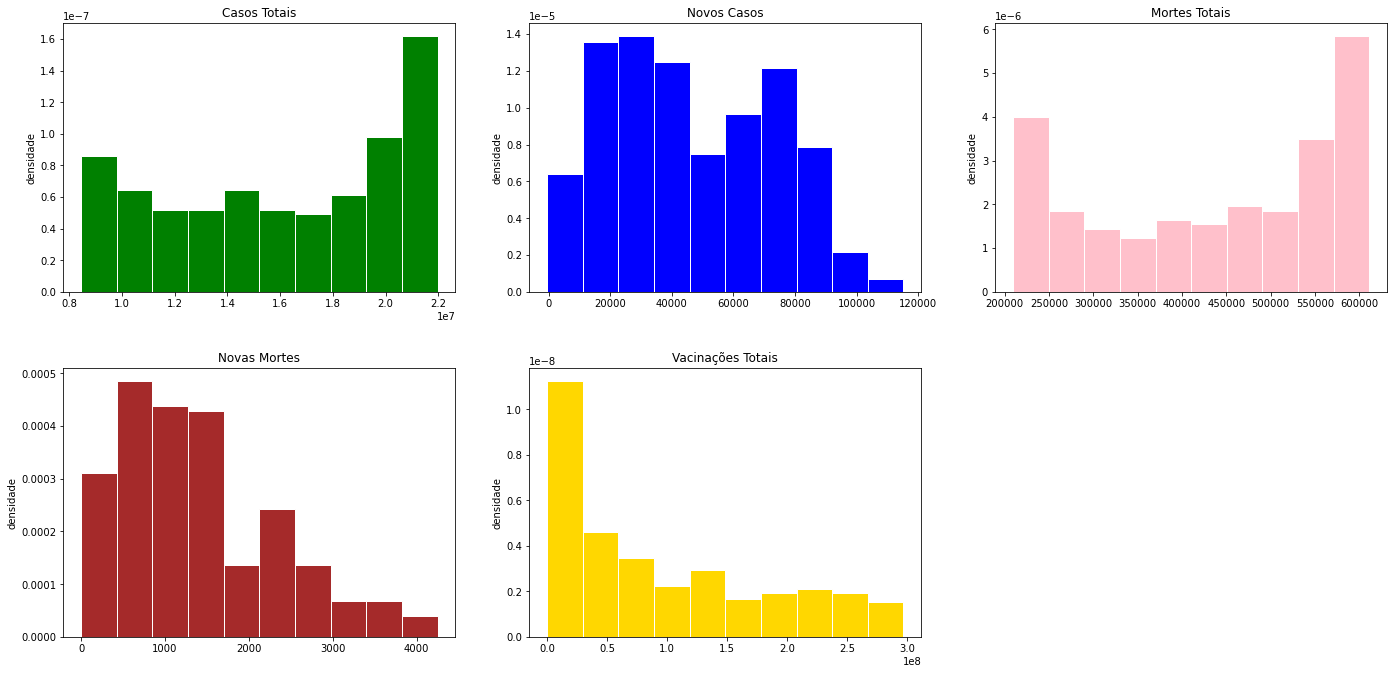

In [7]:
figure = plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.hist(df.total_cases, edgecolor='white', color='green',density=True)
plt.title('Casos Totais')
plt.ylabel('densidade')


plt.subplot(2, 3, 2)
plt.hist(df.new_cases, edgecolor='white', color='blue', density=True)
plt.title('Novos Casos')
plt.ylabel('densidade')


plt.subplot(2, 3, 3)
plt.hist(df.total_deaths, edgecolor='white', color='pink', density=True)
plt.title('Mortes Totais')
plt.ylabel('densidade')


plt.subplot(2, 3, 4)
plt.hist(df.new_deaths, edgecolor='white', color='brown', density=True)
plt.title('Novas Mortes')
plt.ylabel('densidade')


plt.subplot(2, 3, 5)
plt.hist(df.total_vaccinations, edgecolor='white', color='gold', density=True)
plt.title('Vacinações Totais')
plt.ylabel('densidade')

figure.tight_layout(pad=3.0)
plt.show()

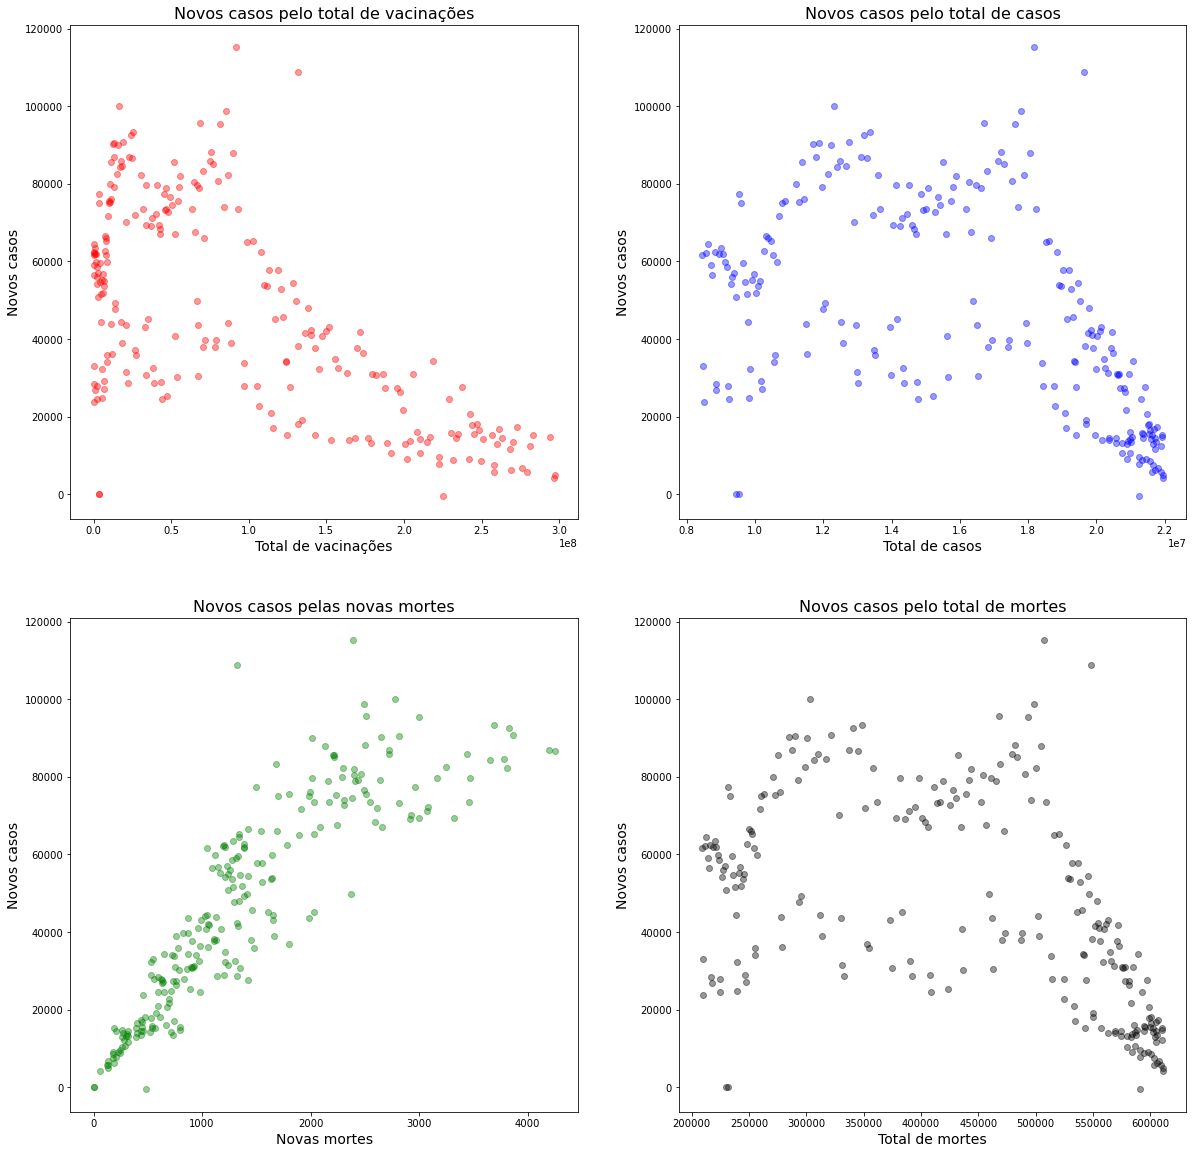

In [8]:
figure = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.scatter(df.total_vaccinations, df.new_cases, c='red', alpha=0.4)
plt.title('Novos casos pelo total de vacinações', fontsize=16)
plt.xlabel('Total de vacinações', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 2)
plt.scatter(df.total_cases, df.new_cases, c='blue', alpha=0.4)
plt.title('Novos casos pelo total de casos', fontsize=16)
plt.xlabel('Total de casos', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 3)
plt.scatter(df.new_deaths, df.new_cases, c='green', alpha=0.4)
plt.title('Novos casos pelas novas mortes', fontsize=16)
plt.xlabel('Novas mortes', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 4)
plt.scatter(df.total_deaths, df.new_cases, c='black', alpha=0.4)
plt.title('Novos casos pelo total de mortes', fontsize=16)
plt.xlabel('Total de mortes', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)
plt.show()


In [9]:
#Dividindo os dados em train e test
X = df[['total_vaccinations', 'new_deaths', 'total_deaths','total_cases']]
Y = df['new_cases']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

<div id="modelos"></div>

___
## Modelos de Predição

<div id="processo"></div>

___
## Processo e Estatísticas de Validação

<div id="multipla"></div>

### Regressão Múltipla

In [10]:
def Regressão(X, Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

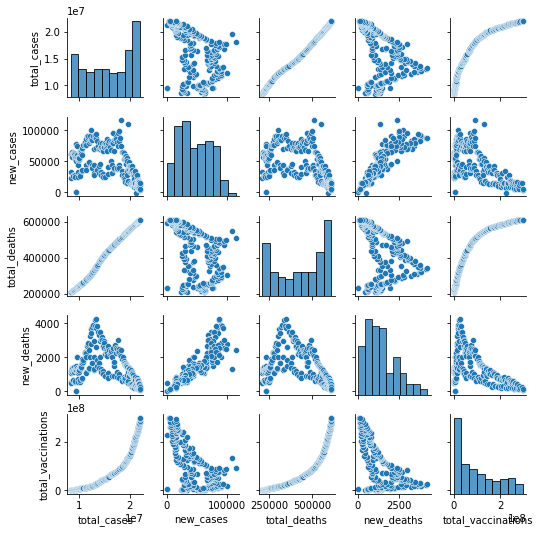

In [11]:
sns.pairplot(df, height=1.5)
plt.show()

In [12]:
results = Regressão(X_train, Y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     198.4
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.55e-66
Time:                        19:55:16   Log-Likelihood:                -2081.1
No. Observations:                 193   AIC:                             4172.
Df Residuals:                     188   BIC:                             4188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.909e+04   1.27e+04      2.298      0.023    4118.934    5.41e+04
total_vaccinations -6.931e-05   3.54e-05     -1.958      0.052      -0.000    5.36e-07
new_deaths            20.6034      1.215     16.953      0.000      18.206      23.001
total_deaths           0.0710      0.123      0.575      0.566      -0.172       0.314
total_cases           -0.0022      0.004     -0.529      0.597      -0.011       0.006
==============================================================================
Omnibus:                       58.858   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.391
Skew:                           1.083   Prob(JB):                     1.43e-58
Kurtosis:                       8.333   Cond. No.                     1.99e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X1 = X_train[['total_vaccinations', 'new_deaths', 'total_deaths']]
results1 = Regressão(X1,Y_train)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     265.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.66e-67
Time:                        19:55:16   Log-Likelihood:                -2081.2
No. Observations:                 193   AIC:                             4170.
Df Residuals:                     189   BIC:                             4184.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.286e+04   4649.175      4.918      0.000    1.37e+04     3.2e+04
total_vaccinations  -8.05e-05   2.83e-05     -2.841      0.005      -0.000   -2.46e-05
new_deaths            20.4717      1.187     17.242      0.000      18.130      22.814
total_deaths           0.0063      0.016      0.383      0.702      -0.026       0.039
==============================================================================
Omnibus:                       57.896   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.725
Skew:                           1.071   Prob(JB):                     2.95e-56
Kurtosis:                       8.217   Cond. No.                     7.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X2 = X_train[['total_vaccinations', 'new_deaths']]
results2 = Regressão(X2,Y_train)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     400.0
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           7.88e-69
Time:                        19:55:16   Log-Likelihood:                -2081.3
No. Observations:                 193   AIC:                             4169.
Df Residuals:                     190   BIC:                             4178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.437e+04   2479.534      9.829      0.000    1.95e+04    2.93e+04
total_vaccinations -7.057e-05   1.14e-05     -6.170      0.000   -9.31e-05    -4.8e-05
new_deaths            20.6592      1.079     19.138      0.000      18.530      22.788
==============================================================================
Omnibus:                       59.356   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.798
Skew:                           1.092   Prob(JB):                     2.59e-59
Kurtosis:                       8.365   Cond. No.                     3.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
beta0_hat = results2.params[0]  # const
beta1_hat = results2.params[1]  # total_vaccinations
beta2_hat = results2.params[2]  # new_deaths

In [16]:
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [17]:
npoints = 100
feature1 = X_test["total_vaccinations"]
feature2 = X_test["new_deaths"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [18]:
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [19]:
fit_z = f(eixo_x, eixo_y)

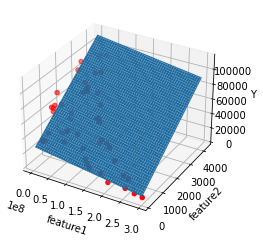

In [20]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y_test, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

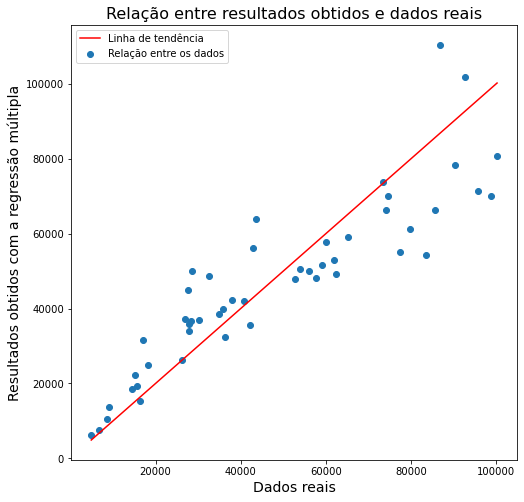

In [21]:
y_pred_m = []
p_1 = X_test.total_vaccinations.to_list()
p_2 = X_test.new_deaths.to_list()
for i in range(len(p_1)):
    y_pred_m.append(f(p_1[i], p_2[i]))

plt.figure(figsize = (8,8))
x_reta = [min(Y_test), max(Y_test)]
plt.scatter(Y_test, y_pred_m, label = 'Relação entre os dados')
plt.plot(x_reta, x_reta, color = 'r', label = 'Linha de tendência')
plt.title("Relação entre resultados obtidos e dados reais", fontsize=16)
plt.xlabel("Dados reais", fontsize=14)
plt.ylabel("Resultados obtidos com a regressão múltipla", fontsize=14)
plt.legend()
plt.show()

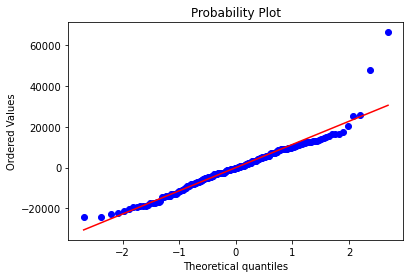

In [22]:
#Gráfico de resíduos
plt.figure()
probplot(results2.resid, dist = 'norm', plot = plt);

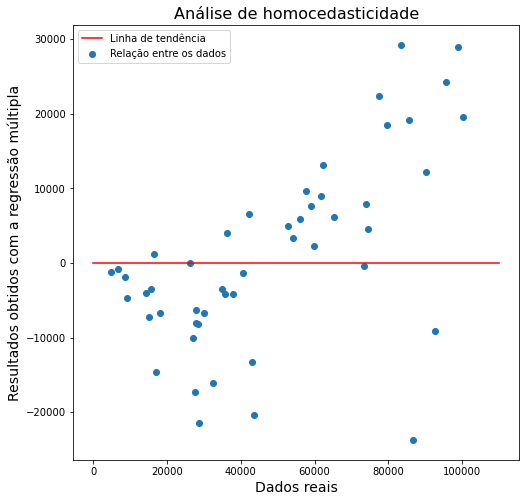

In [23]:
#Análise de homocedasticidade
residuos_m = []
Y_test_list = Y_test.to_list()
for i in range(len(Y_test)):
    r = Y_test_list[i] - y_pred_m[i]
    residuos_m.append(r)

plt.figure(figsize = (8,8))
x_reta = [0, 110000]
y_reta = [0, 0]
plt.scatter(Y_test_list, residuos_m, label = 'Relação entre os dados')
plt.plot(x_reta, y_reta, color = 'r', label = 'Linha de tendência')
plt.title("Análise de homocedasticidade", fontsize=16)
plt.xlabel("Dados reais", fontsize=14)
plt.ylabel("Resultados obtidos com a regressão múltipla", fontsize=14)
plt.legend()
plt.show()

<div id="tree"></div>

### Regression Tree

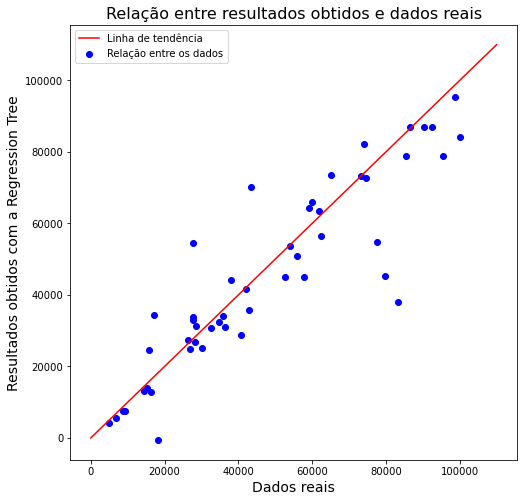

In [24]:
regressor_t = DecisionTreeRegressor()
regressor_t.fit(X_train, Y_train)

# Predicting a new result
y_pred_t = regressor_t.predict(X_test)

# Visualising the Regression Tree:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, y_pred_t, color = 'blue', label = 'Relação entre os dados')
plt.plot(x_reta, x_reta, color = 'r', label = 'Linha de tendência')
plt.title("Relação entre resultados obtidos e dados reais", fontsize=16)
plt.xlabel("Dados reais", fontsize=14)
plt.ylabel("Resultados obtidos com a Regression Tree", fontsize=14)
plt.legend()
plt.show()

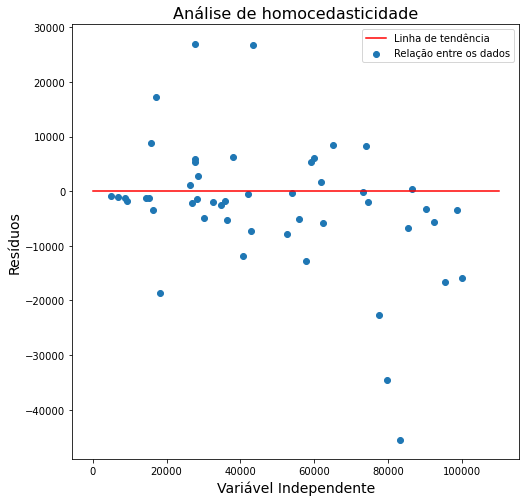

In [25]:
residuos_t = []
for i in range(len(y_pred_t)):
    r = y_pred_t[i] - Y_test_list[i]
    residuos_t.append(r)

plt.figure(figsize = (8,8))
x_reta = [0, 110000]
y_reta = [0, 0]
plt.scatter(Y_test_list, residuos_t, label = 'Relação entre os dados')
plt.plot(x_reta, y_reta, color = 'r', label = 'Linha de tendência')
plt.title("Análise de homocedasticidade", fontsize=16)
plt.xlabel("Variável Independente", fontsize=14)
plt.ylabel("Resíduos", fontsize=14)
plt.legend()
plt.show()

<div id="forest"></div>

### Random Forest Regression

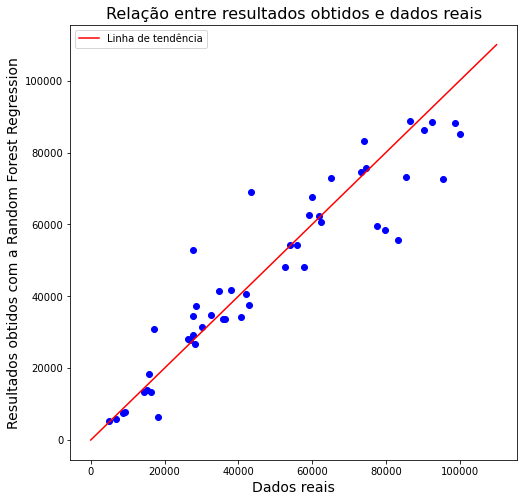

In [26]:
regressor_f = RandomForestRegressor(n_estimators = 100)
regressor_f.fit(X_train, Y_train)

# Predicting a new result
y_pred_f = regressor_f.predict(X_test)

# Visualising the Random Forest Regression results:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, y_pred_f, color = 'blue')
plt.plot(x_reta, x_reta, color = 'r', label = 'Linha de tendência')
plt.title("Relação entre resultados obtidos e dados reais", fontsize=16)
plt.xlabel("Dados reais", fontsize=14)
plt.ylabel("Resultados obtidos com a Random Forest Regression", fontsize=14)
plt.legend()
plt.show()

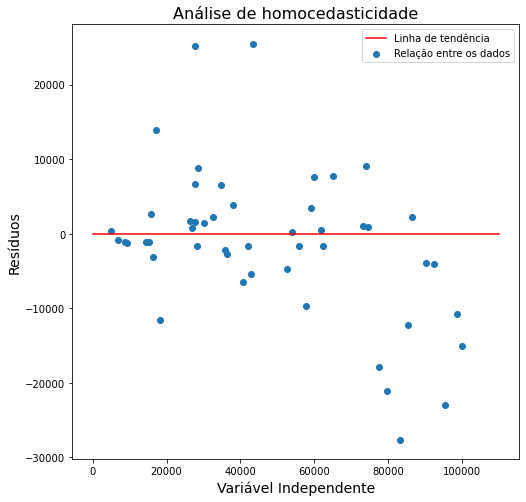

In [27]:
residuos_f = []
for i in range(len(y_pred_f)):
    r = y_pred_f[i] - Y_test_list[i]
    residuos_f.append(r)

plt.figure(figsize = (8,8))
x_reta = [0, 110000]
y_reta = [0, 0]
plt.scatter(Y_test_list, residuos_f, label = 'Relação entre os dados')
plt.plot(x_reta, y_reta, color = 'r', label = 'Linha de tendência')
plt.title("Análise de homocedasticidade", fontsize=16)
plt.xlabel("Variável Independente", fontsize=14)
plt.ylabel("Resíduos", fontsize=14)
plt.legend()
plt.show()

In [28]:
# Calculating mean squared error

error_m = mean_squared_error(Y_test_list, y_pred_m, squared=False)
error_t = mean_squared_error(Y_test_list, y_pred_t, squared=False)
error_f = mean_squared_error(Y_test_list, y_pred_f, squared=False)

error_m, error_t, error_f

(12511.350309001073, 12336.749515664364, 9933.502383077694)

Após calcular a raíz da média do erro ao quadrado, é possível que entre os três modelos de regressão aplicados, o Random Forest Regression apresentou os melhores resultados. Sendo, portanto, o melhor modelo para ajudar a responder a pergunta levantada pelo grupo.

<div id="validacao"></div>

___
## Validação Cruzada

In [29]:
valores_r2_m = []
valores_rms_m = []
valores_r2_t = []
valores_rms_t = []
valores_r2_f = []
valores_rms_f = []
for i in range(10):
    X_train1, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    X3 = X_train1[['total_vaccinations', 'new_deaths']]
    results3 = Regressão(X3,Y_train)
    beta0_hat = results3.params[0]  # const
    beta1_hat = results3.params[1]  # total_vaccinations
    beta2_hat = results3.params[2]  # new_deaths
    y_pred_m1 = []
    p_1 = X_test.total_vaccinations.to_list()
    p_2 = X_test.new_deaths.to_list()
    for i in range(len(p_1)):
        y_pred_m1.append(beta0_hat + beta1_hat*p_1[i] + beta2_hat*p_2[i])
    e_m = mean_squared_error(Y_test_list, y_pred_m1, squared=False)
    valores_rms_m.append(e_m)
    r2_m = r2_score(Y_test_list, y_pred_m1)
    valores_r2_m.append(r2_m)
    
    regressor_t = DecisionTreeRegressor()
    regressor_t.fit(X_train1, Y_train)

    # Predicting a new result
    y_pred_t = regressor_t.predict(X_test)
    e_t = mean_squared_error(Y_test_list, y_pred_t, squared=False)
    valores_rms_t.append(e_t)
    r2_t = r2_score(Y_test_list, y_pred_t)
    valores_r2_t.append(r2_t)

    regressor_f = RandomForestRegressor(n_estimators = 100)
    regressor_f.fit(X_train1, Y_train)

    # Predicting a new result
    y_pred_f = regressor_f.predict(X_test)
    e_f = mean_squared_error(Y_test_list, y_pred_f, squared=False)
    valores_rms_f.append(e_f)
    r2_f = r2_score(Y_test_list, y_pred_f)
    valores_r2_f.append(r2_f)
print('--------------------------------------------------------------------------------')
print('R2 M')

print(np.std(valores_r2_m))
print(np.mean(valores_r2_m))
print('--------------------------------------------------------------------------------')

print('RMS M')

print(np.std(valores_rms_m))
print(np.mean(valores_rms_m))
print('--------------------------------------------------------------------------------')
print('R2 T')

print(np.std(valores_r2_t))
print(np.mean(valores_r2_t))
print('--------------------------------------------------------------------------------')

print('RMS T')

print(np.std(valores_rms_t))
print(np.mean(valores_rms_t))
print('--------------------------------------------------------------------------------')

print('R2 F')

print(np.std(valores_r2_f))
print(np.mean(valores_r2_f))
print('--------------------------------------------------------------------------------')

print('RMS F')

print(np.std(valores_rms_f))
print(np.mean(valores_rms_f))
print('--------------------------------------------------------------------------------')

--------------------------------------------------------------------------------
R2 M
0.47797141797003373
-0.444188692260252
--------------------------------------------------------------------------------
RMS M
7139.482736311744
32447.67280797842
--------------------------------------------------------------------------------
R2 T
0.5324502017483611
-0.5743293943178149
--------------------------------------------------------------------------------
RMS T
7720.656097706835
33818.403567459456
--------------------------------------------------------------------------------
R2 F
0.5085027740931412
-0.47745903661579536
--------------------------------------------------------------------------------
RMS F
8028.24680701808
32631.275780496217
--------------------------------------------------------------------------------


<div id="conclusao"></div>

___
## Conclusão

Diante dos resultados apresentados, pode-se interpretar que o modelo de regressão múltipla mostrou-se ser o mais indicado para ajudar a responder a nossa pergunta, pois apresenta uma menor média de seu R2 e de seu RMS para o processo de validação cruzada.

<div id="referencias"></div>

___
## Referências Bibliográficas

- https://ourworldindata.org/covid-deaths